# 离散余弦变换(DCT，Discrete Cosine Transform)
- https://www.cnblogs.com/wyuzl/p/7880124.html
- 相比DFT而言，只保留了实数部分

## 1D正变换-DCT
### 
$$
    F(u) = c(u) \sum_{x=0}^{X_{size}-1}f(x)\cos[\frac{(x+0.5)\pi}{X_{size}}u] \\
    c(u) = \left\{
\begin{aligned}
\sqrt{\frac{1}{U_{size}}} & , & u=0 \\
\sqrt{\frac{2}{U_{size}}} & , & u\neq0
\end{aligned}
\right.
$$

## 1D逆变换-IDCT
### 
$$
    f(x) = \sum_{u=0}^{U_{size}-1}c(u)F(u)\cos[\frac{(x+0.5)\pi}{X_{size}}u] \\
    c(u) = \left\{
\begin{aligned}
\sqrt{\frac{1}{U_{size}}} & , & u=0 \\
\sqrt{\frac{2}{U_{size}}} & , & u\neq0
\end{aligned}
\right.
$$

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def dct(data, nfreq):
    data   = np.array(data)
    ndata  = len(data)

    output = np.zeros(nfreq)
    for ifreq in range(nfreq):
        c = np.sqrt(1 / nfreq) if ifreq == 0 else np.sqrt(2 / nfreq)
        for idata in range(ndata):
            output[ifreq] += data[idata] * np.cos((idata + 0.5) * np.pi / ndata * ifreq)
        output[ifreq] *= c
    return output

def idct(dct_data, ndata):
    
    nfreq = len(dct_data)
    dct_data = np.array(dct_data)
    output = np.zeros(ndata)
    for idata in range(ndata):
        for ifreq in range(nfreq):
            c = np.sqrt(1 / ndata) if ifreq == 0 else np.sqrt(2 / ndata)
            output[idata] += c * dct_data[ifreq] * np.cos((idata + 0.5) * np.pi / ndata * ifreq)
    return output

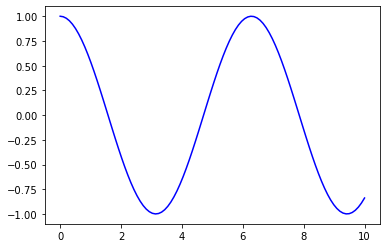

In [3]:
x = np.linspace(0, 10, 100)
y = np.cos(x)
plt.plot(x, y, "b-")

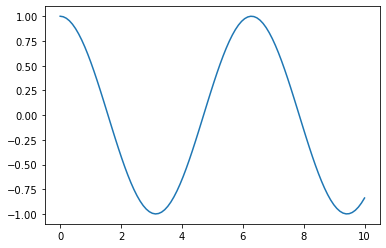

In [4]:
nfreq = len(y)
ndata = len(y)
dct_y = dct(y, nfreq)
res_data = idct(dct_y, len(x))
plt.plot(x, res_data)

In [5]:
array = [3.15, 2.88, 1.76, 3.99, 2.15]
dct_coeff = dct(array, len(array))
idct_value = idct(dct_coeff, len(array))
idct_value

array([3.15, 2.88, 1.76, 3.99, 2.15])

In [32]:
a = [1, 2, 3, 5, 1, 2, 3, 5, 5, 6, 7, 9]
dct(a, len(a))

array([14.1450816 , -6.77376851,  2.73205081, -1.66491882, -1.41421356,
       -2.35287964,  0.8660254 ,  1.00632055,  0.81649658, -0.24774719,
       -0.73205081, -1.4946582 ])